# EXPLORING RELATIONSHIPS

#### Contents:

- 01. Importing libraries and data

- 02. Deriving Variables

- 03. Exploring relationships
      
      - Correlation matrix heatmap
      
      - Scatter-plots
      
      - Pair-plots
      
      - Histograms of Crashes by hour of day
      
      - Categorical plots
     
- 04. Answering questions based on visual analysis

- 05. Defining hypothesis

- 06. Exporting data

### 01. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Assign path

path = r'C:\Users\fiyin\OneDrive\Documents\Achievement 6\NYC Motor Vehicle Collisons Analysis'

In [3]:
# Import data

collisions = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'collisions_clean.pkl'))

In [4]:
collisions.shape

(1001137, 30)

In [5]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,INJURED TOTAL,KILLED TOTAL,CRASH HOUR,CRASH YEAR,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2,0,...,2,0,2,2021,2021-09,09,September,1.0,0.0,Covid and after
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1,0,...,1,0,11,2022,2022-03,03,March,1.0,0.0,Covid and after
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0,0,...,0,0,6,2022,2022-06,06,June,0.0,0.0,Covid and after
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0,0,...,0,0,9,2021,2021-09,09,September,0.0,0.0,Covid and after
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0,0,...,0,0,8,2021,2021-12,12,December,0.0,0.0,Covid and after


### 02. Deriving Variables

In [6]:
collisions['CAUSE VEHICLE 1'].value_counts(dropna = False)

Driver Inattention/Distraction                           247566
Unspecified                                              230828
Following Too Closely                                     85610
Failure to Yield Right-of-Way                             69196
Passing or Lane Usage Improper                            44463
Backing Unsafely                                          42761
Passing Too Closely                                       40578
Unsafe Lane Changing                                      31106
Other Vehicular                                           28776
Turning Improperly                                        23377
Unsafe Speed                                              20526
Traffic Control Disregarded                               20301
Driver Inexperience                                       17149
Reaction to Uninvolved Vehicle                            15827
Alcohol Involvement                                       12061
Pavement Slippery                       

In [7]:
# Check rows where the cause of accident was due to alcohol involvement

collisions.loc[collisions['CAUSE VEHICLE 1'] ==  'Alcohol Involvement']

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,INJURED TOTAL,KILLED TOTAL,CRASH HOUR,CRASH YEAR,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG
45,2022-04-24,21:40:00,BRONX,10452.0,40.843906,-73.924130,"(40.843906, -73.92413)",BOSCOBEL PLACE,0,0,...,0,0,21,2022,2022-04,04,April,0.0,0.0,Covid and after
68,2021-12-09,02:45:00,QUEENS,11422.0,40.653023,-73.738950,"(40.653023, -73.73895)",149 AVENUE,1,0,...,1,0,2,2021,2021-12,12,December,1.0,0.0,Covid and after
103,2022-03-26,15:45:00,BRONX,10472.0,40.833965,-73.862900,"(40.833965, -73.8629)",WHITE PLAINS ROAD,2,0,...,2,0,15,2022,2022-03,03,March,1.0,0.0,Covid and after
192,2022-03-26,11:20:00,NaN,NaN,40.624763,-73.965180,"(40.624763, -73.96518)",CONEY ISLAND AVENUE,1,0,...,1,0,11,2022,2022-03,03,March,1.0,0.0,Covid and after
201,2022-03-26,23:00:00,QUEENS,11420.0,40.676304,-73.816284,"(40.676304, -73.816284)",NaN,0,0,...,0,0,23,2022,2022-03,03,March,0.0,0.0,Covid and after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960020,2022-12-17,06:31:00,BRONX,10472.0,40.829160,-73.874500,"(40.82916, -73.8745)",NaN,0,0,...,0,0,6,2022,2022-12,12,December,0.0,0.0,Covid and after
1960630,2022-11-16,01:09:00,BRONX,10451.0,40.818012,-73.925190,"(40.818012, -73.92519)",EAST 149 STREET,4,0,...,4,0,1,2022,2022-11,11,November,1.0,0.0,Covid and after
1961748,2022-11-29,14:50:00,NaN,NaN,40.891630,-73.851840,"(40.89163, -73.85184)",EAST 233 STREET,0,0,...,0,0,14,2022,2022-11,11,November,0.0,0.0,Covid and after
1963143,2022-11-30,19:15:00,NaN,NaN,40.637660,-74.162350,"(40.63766, -74.16235)",NaN,0,0,...,0,0,19,2022,2022-11,11,November,0.0,0.0,Covid and after


In [8]:
# Create flags for incidents with alcohol involvement

collisions.loc[collisions['CAUSE VEHICLE 1'] != 'Alcohol Involvement', 'DUI FLAG'] = 0
collisions.loc[collisions['CAUSE VEHICLE 1'] == 'Alcohol Involvement', 'DUI FLAG'] = 1

In [9]:
# Frequency check

collisions['DUI FLAG'].value_counts(dropna = False)

0.0    989076
1.0     12061
Name: DUI FLAG, dtype: int64

In [10]:
# Percentage frequency check

collisions['DUI FLAG'].value_counts(normalize = True) * 100

0.0    98.79527
1.0     1.20473
Name: DUI FLAG, dtype: float64

In [11]:
# Group total DUI incidents by the hour

collisions['DUI SUM'] = collisions.groupby(['CRASH HOUR'])['DUI FLAG'].transform(np.sum)

In [12]:
collisions.shape

(1001137, 32)

### 03. Exploring Relationships

In [13]:
collisions.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'PERSONS INJURED',
       'PERSONS KILLED', 'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED',
       'CYCLISTS INJURED', 'CYCLISTS KILLED', 'MOTORISTS INJURED',
       'MOTORISTS KILLED', 'CAUSE VEHICLE 1', 'CAUSE VEHICLE 2',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'INJURED TOTAL', 'KILLED TOTAL',
       'CRASH HOUR', 'CRASH YEAR', 'CRASH Y-M', 'CRASH MONTH NO',
       'CRASH MONTH', 'INJURY FLAG', 'DEATH FLAG', 'COVID FLAG', 'DUI FLAG',
       'DUI SUM'],
      dtype='object')

In [14]:
# Create a subset with relevant variables needed for correlation chart

collisions_sub = collisions[['CRASH HOUR', 'CRASH MONTH NO',
                             'PERSONS INJURED', 'PERSONS KILLED', 
                             'PEDESTRIANS INJURED','PEDESTRIANS KILLED', 
                             'CYCLISTS INJURED', 'CYCLISTS KILLED',
                             'MOTORISTS INJURED', 'MOTORISTS KILLED', 'DUI SUM']]

In [15]:
# Correlation matrix using the subset dataframe

collisions_sub.corr()

,CRASH HOUR,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,DUI SUM
CRASH HOUR,1.000000,0.027215,-0.007585,0.033403,-0.002089,0.041082,-0.000475,0.004690,-0.008418,-0.066351
PERSONS INJURED,0.027215,1.000000,0.015419,0.263645,0.003555,0.176051,-0.000622,0.906384,0.020293,0.063291
PERSONS KILLED,-0.007585,0.015419,1.000000,0.008256,0.683910,-0.003499,0.303689,0.014376,0.662187,0.019378
PEDESTRIANS INJURED,0.033403,0.263645,0.008256,1.000000,0.014943,-0.032931,0.003037,-0.072081,-0.003647,0.003147
PEDESTRIANS KILLED,-0.002089,0.003555,0.683910,0.014943,1.000000,-0.002130,0.039673,-0.000902,0.007062,0.009516
CYCLISTS INJURED,0.041082,0.176051,-0.003499,-0.032931,-0.002130,1.000000,0.002972,-0.059054,-0.004196,0.010704
CYCLISTS KILLED,-0.000475,-0.000622,0.303689,0.003037,0.039673,0.002972,1.000000,-0.002437,-0.000277,0.003110
MOTORISTS INJURED,0.004690,0.906384,0.014376,-0.072081,-0.000902,-0.059054,-0.002437,1.000000,0.023962,0.061835
MOTORISTS KILLED,-0.008418,0.020293,0.662187,-0.003647,0.007062,-0.004196,-0.000277,0.023962,1.000000,0.018103
DUI SUM,-0.066351,0.063291,0.019378,0.003147,0.009516,0.010704,0.003110,0.061835,0.018103,1.000000


### Correlation Matrix Heatmap

In [16]:
# To ensure charts are displayed without the need to call them specifically.

%matplotlib inline

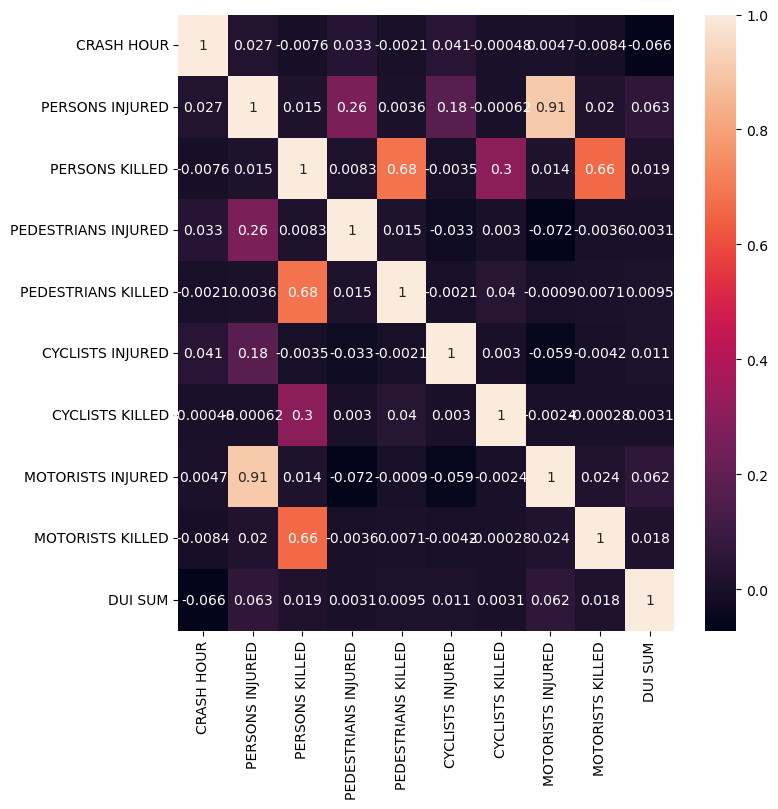

In [17]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(8,8))


# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr_heat = sns.heatmap(collisions_sub.corr(), annot = True, ax = ax)


# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'corr_heat.png'))

##### Notes: 

- Strong relationship (correlation = 0.91) between PERSONS INJURED and MOTORISTS INJURED. This makes sense as the vehicle occupants will naturally sustain the most injuries.

- Strong relationship (correlation = 0.66) between PERSONS KILLED and MOTORISTS KILLED. This also makes sense as it is the vehicle occupants that have the greatest risk of dying.

- Strong relationship (correlation = 0.68) between PERSONS KILLED and PEDESTRIANS KILLED. This one is more interesting because it shows that pedestrians are just as likely to die from a car crash/collision as motorists

- Moderate relationship (correlation 0.3)between PERSONS KILLED and CYCLISTS KILLED

- Moderate relationship (correlation 0.26) between PERSONS INJURED and PEDESTRIANS  INJURED

- Weak relationship (correlation 0.18) between PERSONS INJURED and CYCLISTS INJURED

### Scatterplots

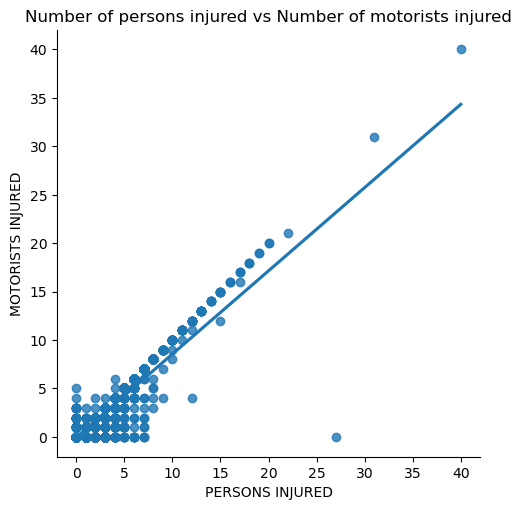

In [18]:
# Create a scatterplot for the "PERSONS INJURED" and "MOTORISTS INJURED" columns in seaborn

sns.lmplot(x = 'PERSONS INJURED', y = 'MOTORISTS INJURED', data = collisions_sub)
plt.title('Number of persons injured vs Number of motorists injured')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'motorist_persons_injured_scat.png'))

###### Notes:

- Most of the data points are clustered at the bottom left (between 0 and 5), and slightly below the trend line.

- Generally, as the number of PERSONS INJURED increases, the number of MOTORIST INJURED also increases. Naturally motorists are most susceptible to injuries from car crashes.

- There are a few outliers where the number of persons injured is high while the number of motorists injured is low. This means that other non-motorists were injured in those cases.

- There are irregularities where there are more motorists injured than total number of persons injured. Requires further investigation.

###### Investigating consistency error

In [19]:
# Create a subset to further investigate consistency errors within entire dataset.

anomaly1 = collisions.loc[collisions['MOTORISTS INJURED'] > collisions['PERSONS INJURED']]

In [20]:
anomaly1.shape

(78, 32)

In [21]:
anomaly1[['PERSONS INJURED', 'PEDESTRIANS INJURED', 'CYCLISTS INJURED', 'MOTORISTS INJURED']].head(10)

,PERSONS INJURED,PEDESTRIANS INJURED,CYCLISTS INJURED,MOTORISTS INJURED
506866,0,0,0,1
565362,0,0,0,1
590696,0,0,0,3
598286,0,0,0,1
607151,0,0,0,1
608099,0,0,0,1
611325,0,0,0,1
630438,0,0,0,1
631766,3,1,0,4
639077,0,0,0,1


In [22]:
# Second subset where persons injured > 0.

anomaly2 = anomaly1.loc[anomaly1['PERSONS INJURED'] != 0]

In [23]:
anomaly2.shape

(11, 32)

In [24]:
anomaly2[['PERSONS INJURED', 'PEDESTRIANS INJURED', 'CYCLISTS INJURED', 'MOTORISTS INJURED']].head(10)

,PERSONS INJURED,PEDESTRIANS INJURED,CYCLISTS INJURED,MOTORISTS INJURED
631766,3,1,0,4
665721,1,0,0,2
691863,4,0,0,6
692172,2,0,0,4
749656,1,0,0,3
761536,1,0,0,2
800583,2,0,0,3
805503,1,0,0,2
886435,1,0,0,2
897922,4,0,0,5


In [25]:
# Check rows where injured total and persons injured do not match
# INJURED TOTAL is a derived variable with the sum of injured motorists, pedestrians, and cyclists

mismatch = collisions.loc[collisions['PERSONS INJURED'] != collisions['INJURED TOTAL']]

In [26]:
mismatch.shape

(4531, 32)

In [27]:
mismatch[['PERSONS INJURED', 'INJURED TOTAL']].head(10)

,PERSONS INJURED,INJURED TOTAL
47,1,0
284,1,0
356,1,0
385,1,0
409,1,0
421,1,0
563,1,0
904,1,0
989,1,0
1222,1,0


In [28]:
# Looking for incidents where PERSONS INJURED is less than INJURED TOTA

mismatch2 = mismatch.loc[(mismatch['PERSONS INJURED']) < (mismatch['INJURED TOTAL'])]

In [29]:
mismatch2.shape

(88, 32)

In [30]:
mismatch2[['PERSONS INJURED', 'INJURED TOTAL']].head(10)

,PERSONS INJURED,INJURED TOTAL
506866,0,1
560469,0,1
565362,0,1
566507,1,2
570042,0,1
580003,3,4
590696,0,3
598286,0,1
607151,0,1
608099,0,1


In [31]:
# From results above, I chose to replace values of PERSONS INJURED with values of INJURED TOTAL 
# (where PERSONS INJURED is less than INJURED TOTAL) in order to continue working with the PERSONS INJURED variable, 
# especially since INJURED TOTAL covers the sum of all persons injured (pedestrians, cyclists, motorists).
# PERSONS INJURED will still have cases that aren't accounted for in the other variables

collisions['PERSONS INJURED'] = np.where(collisions['PERSONS INJURED'] < collisions['INJURED TOTAL'], 
                               collisions['INJURED TOTAL'], collisions['PERSONS INJURED'])

In [32]:
collisions.shape

(1001137, 32)

In [33]:
# Update mismatch dataframe

mismatch = collisions.loc[collisions['PERSONS INJURED'] != collisions['INJURED TOTAL']]

In [34]:
mismatch.shape

# Still many inconsistencies.

(4443, 32)

In [35]:
# Update collisions subset

collisions_sub = collisions[['CRASH HOUR', 'CRASH MONTH NO',
                             'PERSONS INJURED', 'PERSONS KILLED', 
                             'PEDESTRIANS INJURED','PEDESTRIANS KILLED', 
                             'CYCLISTS INJURED', 'CYCLISTS KILLED',
                             'MOTORISTS INJURED', 'MOTORISTS KILLED', 'DUI SUM']]

### Exploring Relationships continued

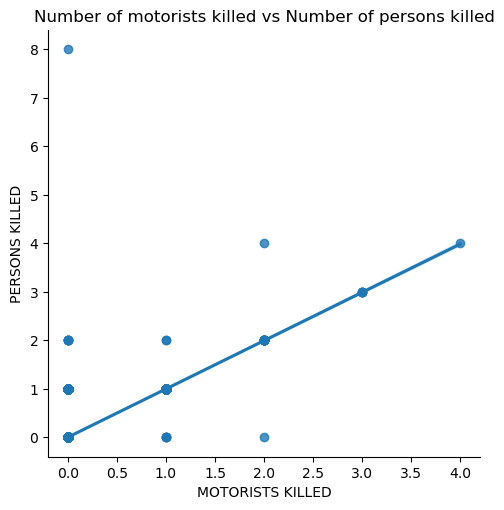

In [36]:
# Create a scatterplot for the "PERSONS KILLED" and "MOTORIST KILLED" columns in seaborn


sns.lmplot(x = 'MOTORISTS KILLED', y = 'PERSONS KILLED', data = collisions_sub)
plt.title('Number of motorists killed vs Number of persons killed')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'motorist_persons_killed_scat.png'))

###### Notes:

- A number of data points are exactly on the positive trend line which shows that, in these instances, all persons killed where motorists.

- There are a number of outliers, most of them above the trend line. In these cases, there were obviously more casualities were non-motorists where killed.

- The outliers below the trend line require further investigation because it isn't possible to have more motorists killed than total number of persons killed

##### Investigating consistency errror

In [37]:
# Create a subset to further investigate consistency errors within entire dataset.

anomaly3 = collisions.loc[collisions['MOTORISTS KILLED'] > collisions['PERSONS KILLED']]

In [38]:
anomaly3.shape

(5, 32)

In [39]:
anomaly3[['PERSONS KILLED', 'PEDESTRIANS KILLED', 'CYCLISTS KILLED', 'MOTORISTS KILLED']].head()

,PERSONS KILLED,PEDESTRIANS KILLED,CYCLISTS KILLED,MOTORISTS KILLED
583707,0,0,0,1
797812,0,0,0,1
822165,0,0,0,1
831735,0,0,0,2
843933,0,0,0,1


In [40]:
# Check rows where injured total and persons injured do not match

mismatch3 = collisions.loc[collisions['PERSONS KILLED'] != collisions['KILLED TOTAL']]

In [41]:
mismatch3.shape

(38, 32)

Note: There are only 38 rows where the two columns don't match. This is much less than the persons injured variables.

In [42]:
mismatch3[['PERSONS KILLED', 'PEDESTRIANS KILLED', 'CYCLISTS KILLED', 'MOTORISTS KILLED', 'KILLED TOTAL']].tail(10)

,PERSONS KILLED,PEDESTRIANS KILLED,CYCLISTS KILLED,MOTORISTS KILLED,KILLED TOTAL
797812,0,0,0,1,1
822165,0,0,0,1,1
831735,0,0,0,2,2
843933,0,0,0,1,1
1927368,1,0,0,0,0
1933448,1,0,0,0,0
1938452,1,0,0,0,0
1941772,1,0,0,0,0
1945091,1,0,0,0,0
1958182,1,0,0,0,0


In [43]:
# Subset of cases where KILLED TOTAL is more than PERSONS KILLED

replacement_check = mismatch3.loc[mismatch3['KILLED TOTAL'] > mismatch3['PERSONS KILLED']]

In [44]:
replacement_check.shape

(5, 32)

In [45]:
replacement_check[['PERSONS KILLED', 'PEDESTRIANS KILLED', 'CYCLISTS KILLED', 'MOTORISTS KILLED', 'KILLED TOTAL']].head(5)

,PERSONS KILLED,PEDESTRIANS KILLED,CYCLISTS KILLED,MOTORISTS KILLED,KILLED TOTAL
583707,0,0,0,1,1
797812,0,0,0,1,1
822165,0,0,0,1,1
831735,0,0,0,2,2
843933,0,0,0,1,1


It's the same 5 rows from earlier where the number of motorists killed is higher than the number of persons killed. 
In the main data set, there are still 33 cases where there is a value for PERSONS KILLED, but no corresponding values in the other 'KILLED' columns.
It isn't possible in those cases to identify if the person killed was a pedestrian, cyclist, or motorist.

In [46]:
# Where motorists killed > persons killed, replace persons killed with value of motorists killed
# Since there are only five rows, and the numbers are low, I think it is safe here to replace the values.

collisions['PERSONS KILLED'] = np.where(collisions['PERSONS KILLED'] == 0, 
                               collisions['MOTORISTS KILLED'], collisions['PERSONS KILLED'])

In [47]:
# Check results

collisions.loc[collisions_sub['MOTORISTS KILLED'] > collisions['PERSONS KILLED']]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH HOUR,CRASH YEAR,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM


In [48]:
# Update collisions subset

collisions_sub = collisions[['CRASH HOUR', 'CRASH MONTH NO',
                             'PERSONS INJURED', 'PERSONS KILLED', 
                             'PEDESTRIANS INJURED','PEDESTRIANS KILLED', 
                             'CYCLISTS INJURED', 'CYCLISTS KILLED',
                             'MOTORISTS INJURED', 'MOTORISTS KILLED', 'DUI SUM']]

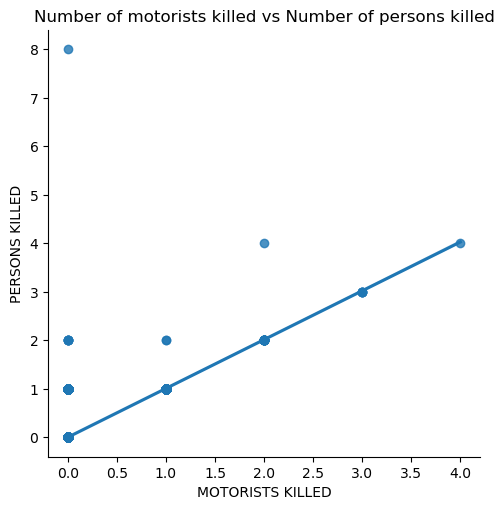

In [49]:
# Update scatterplot for the "PERSONS KILLED" and "MOTORIST KILLED" columns in seaborn

sns.lmplot(x = 'MOTORISTS KILLED', y = 'PERSONS KILLED', data = collisions_sub)
plt.title('Number of motorists killed vs Number of persons killed')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'motorist_persons_killed_scat.png'))

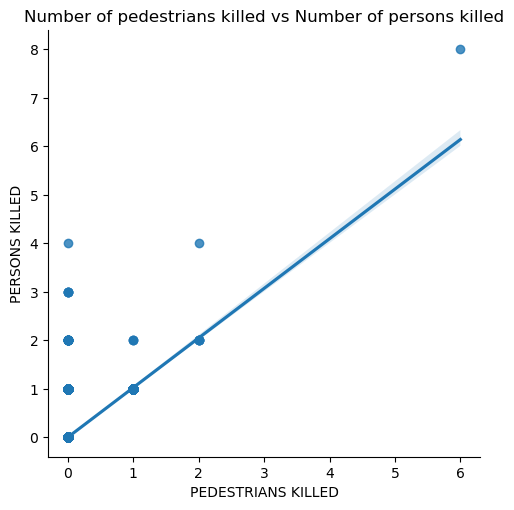

In [50]:
# Create a scatterplot for the "PERSONS KILLED" and "PEDESTRIANS KILLED" columns in seaborn

sns.lmplot(x = 'PEDESTRIANS KILLED', y = 'PERSONS KILLED', data = collisions_sub)
plt.title('Number of pedestrians killed vs Number of persons killed')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pedestrians_persons_killed_scat.png'))

##### Notes:

- There are a couple of data points where the number of persons killed is the same as the number of pedestrians killed. This likely represent accidents where only pedestrians where killed.

- Most of the data points, however, are above the trend line, where there were 0 pedestrian deaths but other persons were killed.

- There is a notable outlier where pedestrian deaths were very high

In [51]:
# Checking case with very high pedestrian deaths

collisions_sub.loc[collisions['PEDESTRIANS KILLED'] > 4]

,CRASH HOUR,CRASH MONTH NO,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,DUI SUM
781888,15,10,12,8,7,6,1,2,4,0,203.0


In [52]:
# With entire data set to search for date and location

collisions.loc[collisions['PEDESTRIANS KILLED'] > 4]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH HOUR,CRASH YEAR,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM
781888,2017-10-31,15:08:00,MANHATTAN,10014.0,40.729046,-74.01073,"(40.729046, -74.01073)",WEST STREET,12,8,...,15,2017,2017-10,10,October,1.0,1.0,Before Covid,0.0,203.0


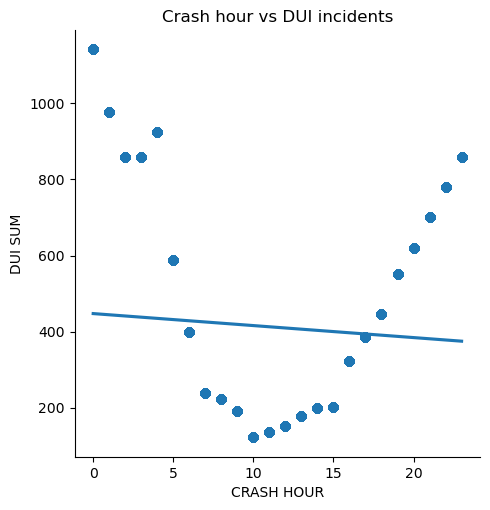

In [53]:
# Create a scatterplot for the "CRASH HOUR" and "DUI sum" variables in seaborn

sns.lmplot(x = 'CRASH HOUR', y = 'DUI SUM', data = collisions_sub)
plt.title('Crash hour vs DUI incidents')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hour_DUI_scat.png'))

Note: The correlation here is weak. However, the DUI incidents starts to increase from the mid afternoon hours into the late night and early morning hours

### Pair-plots

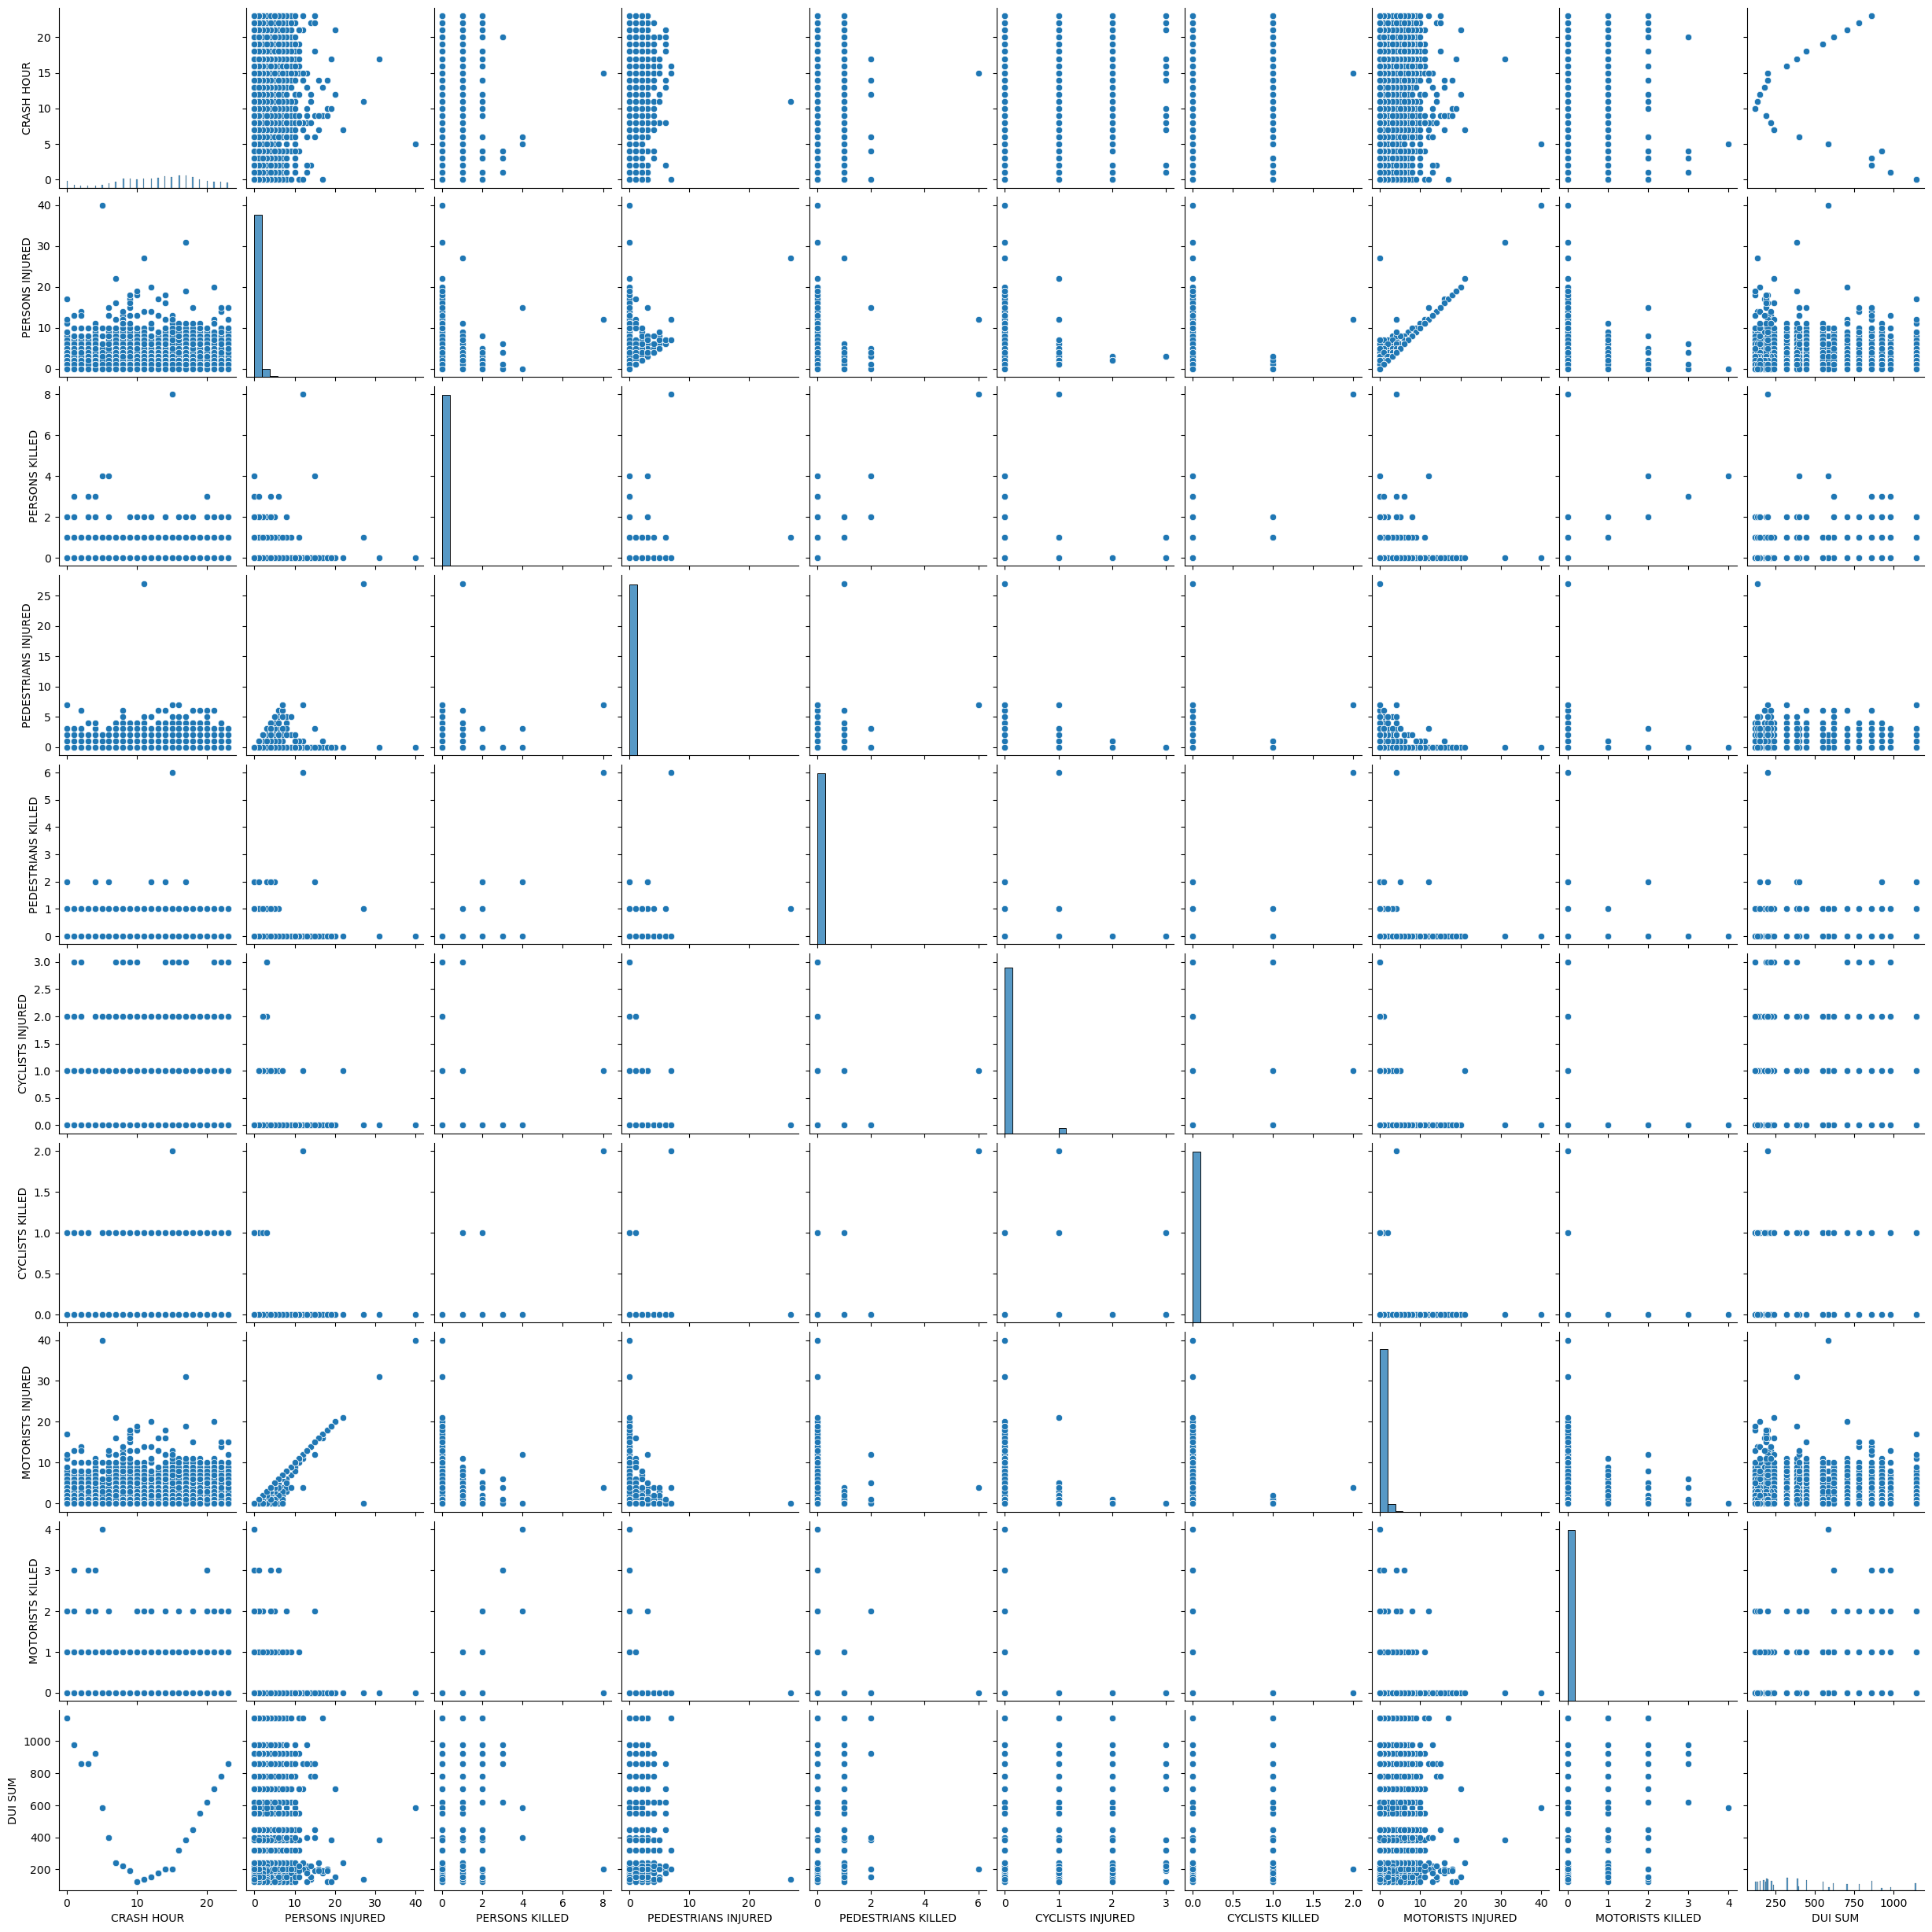

In [54]:
# Create a pair plot

pair_plot = sns.pairplot(collisions_sub)

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pair_plot.png'))

###### Notes: 
The distribution of most of the variables is heavily right skewed. From exploratory analysis, I know that most of these values are zero, which likely means that in the majority of vehicle collisions and crashes, the number of casualties (injuries/deaths) is generally very low.

### Histograms of crashes by hour of day

Text(0.5, 1.0, 'Crashes by hour of day')

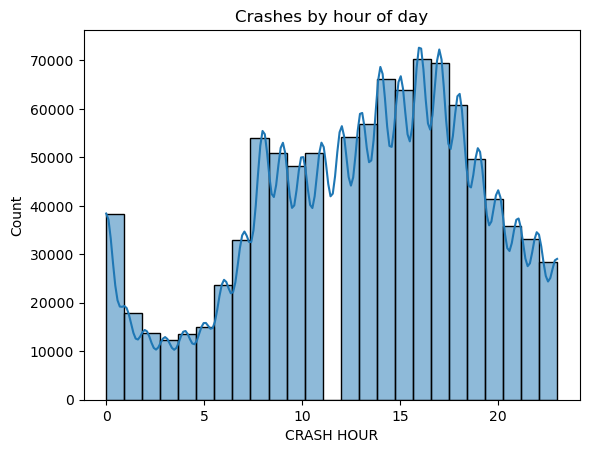

In [55]:
# Histogram to visualize the hours of the day when crashes occur

sns.histplot(collisions_sub['CRASH HOUR'], bins = 25, kde = True)

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'crash_hour_hist.png'))
plt.title('Crashes by hour of day')

<AxesSubplot:>

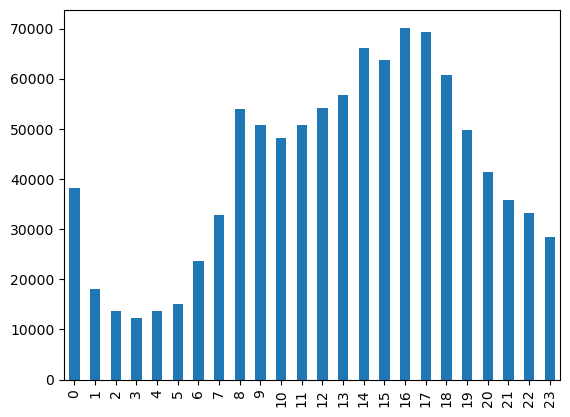

In [56]:
collisions['CRASH HOUR'].value_counts().sort_index().plot.bar()

Notes:  There are few accidents in the early hours of the morning. The number of accidents starts to increase around 7 am (when people generally begin their day, to go to work or elsewhere). It peaks around 4 pm and 5pm (perhaps when people are returning from work and there are more cars on the streets).

### Categorical Plots

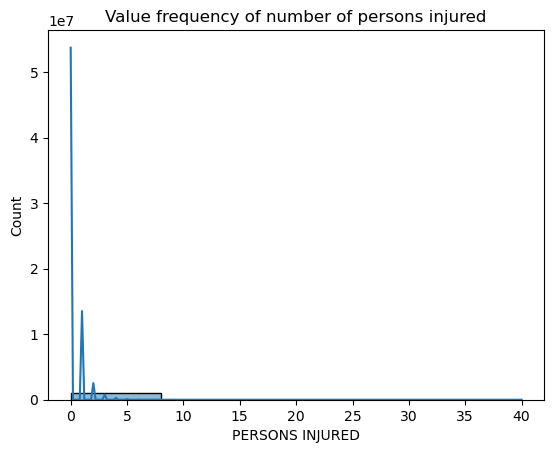

In [57]:
# Histogram to visualize the distribution of number of persons injured

sns.histplot(collisions_sub['PERSONS INJURED'], bins = 5, kde = True)
plt.title('Value frequency of number of persons injured')

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'persons_injured_hist.png'))

In [58]:
# Checking frequency of persons killed

collisions_sub['PERSONS INJURED'].value_counts(dropna = False)

0     754862
1     191145
2      36470
3      11617
4       4296
5       1601
6        619
7        259
8        117
9         45
10        36
11        19
12        11
13        10
15         7
14         5
17         4
18         3
16         3
20         2
19         2
40         1
22         1
31         1
27         1
Name: PERSONS INJURED, dtype: int64

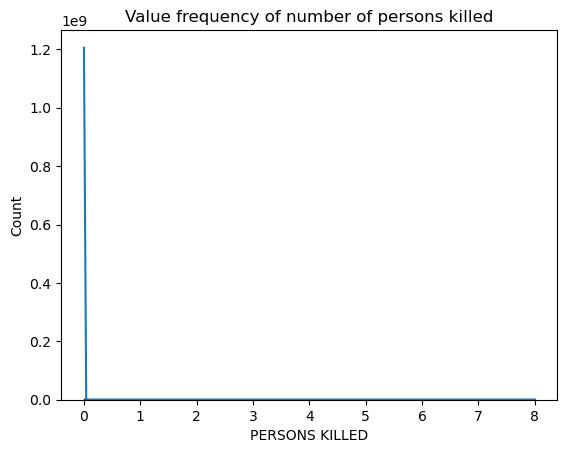

In [59]:
# Histogram to visualize the distribution of number of persons killed

sns.histplot(collisions_sub['PERSONS KILLED'], bins = 1 , kde = True)
plt.title('Value frequency of number of persons killed')


# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'persons_killed_hist.png'))

###### Notes: 
In most accidents, the number of deaths is generally very low (mostly zero).

In [60]:
# Checking frequency of persons killed

collisions_sub['PERSONS KILLED'].value_counts(dropna = False)

0    999616
1      1476
2        37
3         5
4         2
8         1
Name: PERSONS KILLED, dtype: int64

### 04. Answering questions based on visual analysis

- Which group suffers the most injuries during motor collisions?
    - Motorists

- Which group has the most deaths from motor collisions?
    - Motorists 

- How many deaths occur in most collisions?
    - The number of deaths are generally very few. Most collisions have 0 deaths
    
- What hours of the day do most accidents occur?
    - Between 4 and 5 pm

### 05. Defining hypothesis

###### Potential hypothesis:

- Motorists are most likely to die from a car crash

- Motorists are most likely to be injured in a car crash

- Car crashes are most likely to occur in the afternoon hours

### 06. Exporting data

In [61]:
# Export data

collisions.to_pickle(os.path.join(path, '02. Data', 'Prepared data', 'collisions_explored.pkl'))